In [19]:
import numpy as np
import seaborn as sns
import pandas as pd
import random
from collections import defaultdict
import matplotlib.pyplot as plt

In [2]:
np.random.seed(0)

mu ,sigma = 0, 1
sampleNo = 1000


In [5]:
hands = 10
qA = np.random.normal(mu, sigma, hands)
df = pd.DataFrame(columns=("action", "value"))
for idx in range(hands):
    At = pd.DataFrame({"action": np.ones(sampleNo) + idx, "value": qA[idx] + np.random.normal(mu, sigma, sampleNo)})
    df = pd.concat([df, At])

print(df.head())

   action     value
0     1.0  1.117237
1     1.0  0.521070
2     1.0  0.332894
3     1.0  0.156033
4     1.0 -3.199233


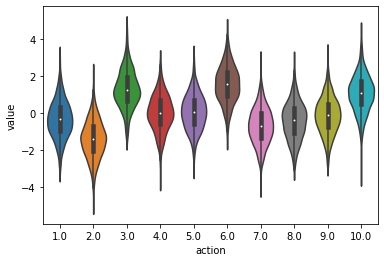

In [6]:
sns.violinplot(x="action", y="value", data=df)

In [15]:
def Qt(action, history):
    total = history[action]
    if len(total) <= 2: return random.uniform(0, 1)
    return sum(total) / len(total)

In [16]:
def At(maxQt):
    return np.argmax(maxQt)

In [24]:
steps = 1000
history = defaultdict(list)
arr_hist = []

for step in range(steps):
    act_value = []
    for act in range(1, hands+1):
        v = Qt(act, history)
        act_value.append(v)
    indx = At(act_value) + 1
    history[indx].append(act_value[indx - 1])
    arr_hist.append(act_value[indx - 1])


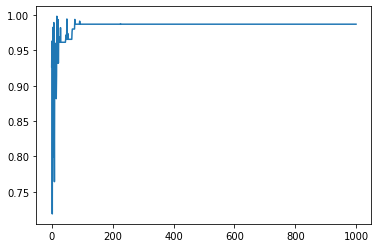

In [25]:
plt.plot(arr_hist)